# Jets 101

## Loading libraries

We will use the [coffea package](https://coffeateam.github.io/coffea) and all the newest pythonic libraries:

In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import hist
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)

The following `JMENanoAODSchema` class and the file that this notebook is using are not part of the official CMS NanoAOD. It is just for educational purposes. The `JetCalo` collection is not part of the official nanoAOD files.

In [2]:
class JMENanoAODSchema(NanoAODSchema):

    mixins = {
        **NanoAODSchema.mixins,
        "JetCalo": "Jet",
    }

    all_cross_references = {
        **NanoAODSchema.all_cross_references,
    }

For this exercise, we will use one file from the $t\bar{t}$ process:

In [3]:
fname = "root://eosuser.cern.ch//eos/user/c/cmsdas/2025/jets/RunIISummer20UL18NanoAODv9/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/2520000/47A0D984-2D6F-0D42-B5CB-906786434349.root"
events = NanoEventsFactory.from_root( fname, schemaclass=JMENanoAODSchema).events()

## Exercise 1.1: Comparing jet areas between AK4 and AK8

In [4]:
hists2 = (
    hist.Hist.new
    .StrCat(["ak4", "ak8"], name="jet_type")
    .Reg(50, 0, 500, name="pt")
    .Reg(40, -5, 5, name="eta")
    .Reg(40, -5, 5, name="phi")
    .Reg(20, 0, 100, name="mass")
    .Reg(30, 0, 3, name="area")
    .Weight()
    .fill(
        jet_type="ak4",
        pt=ak.flatten(events.Jet.pt),
        eta=ak.flatten(events.Jet.eta),
        phi=ak.flatten(events.Jet.phi),
        mass=ak.flatten(events.Jet.mass),
        area=ak.flatten(events.Jet.area)
    )
    .fill(
        jet_type="ak8",
        pt=ak.flatten(events.FatJet.pt),
        eta=ak.flatten(events.FatJet.eta),
        phi=ak.flatten(events.FatJet.phi),
        mass=ak.flatten(events.FatJet.mass),
        area=ak.flatten(events.FatJet.area)
    )
)
# one prong jets - result of fragementation and hadronization of single quarks/gluons produced by QCD background
# two prong jets - result of heavy particle decay that are boosted (movinf really fast)- W/Z boson decay
# three prong jets - top quark decay

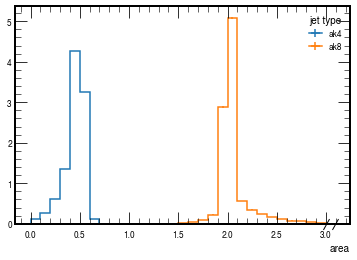

In [5]:
fig, ax = plt.subplots()
hists2.project("jet_type", "area").plot1d(density=True, ax=ax)
ax.legend(title="jet type")
# compares area

## Your turn

You can make plots for other quantities between ak4 and ak8 jets.

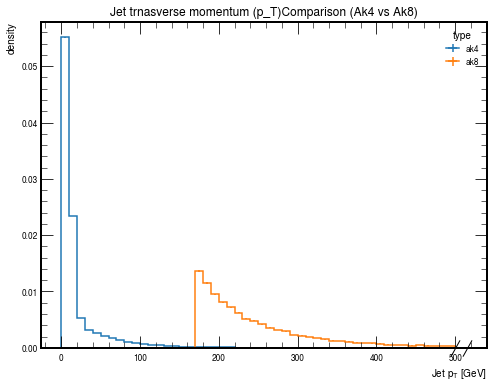

In [25]:
fig_pt, ax_pt = plt.subplots(figsize=(8, 6))

hists2.project("jet_type", "pt").plot1d(ax=ax_pt, density=True)

ax_pt.legend(title="type")
ax_pt.set_title("Jet trnasverse momentum (p_T)Comparison (Ak4 vs Ak8)")
ax_pt.set_xlabel("Jet $p_T$ [GeV]")
ax_pt.set_ylabel("density")
plt.show()

#comapring transeverse momentum between Ak4 and Ak8 jets
# For Ak4 with smaller radius (0.4), there are more jets (higher density) but with lower transverse momentum (shiffted to the left)
# for Ak8 with larger radius (0.8), there is higher transverse momentum since it clusters high energy particles into single jet so captures more energy and momentum scattered from large angles 

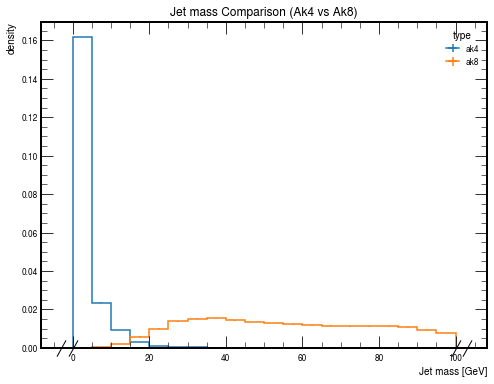

In [26]:
fig_mass, ax_mass = plt.subplots(figsize=(8, 6))

# Project the 5D histogram onto the 'mass' axis, summing over all other dimensions.
# We set the x-axis range for mass to be 0 to 30 GeV, as defined in the histogram.
hists2.project("jet_type", "mass").plot1d(ax=ax_mass, density=True)

ax_mass.legend(title="type")
ax_mass.set_title("Jet mass Comparison (Ak4 vs Ak8)")
ax_mass.set_xlabel("Jet mass [GeV]")
ax_mass.set_ylabel("density")
plt.show()

# comparing mass between Ak4 and Ak8 jets
# Ak4 has much smaller mass since only comprised of mass of a single quark or maybe gluon so total mass is visrtually 0
# Ak8 contains mass of heavy boosted particles sp obviously more mass(W bosons - 80GeV or top quark - 172GeV)

## Exercise 1.2: Jet Types and Algorithms

Let's make histograms for different jets:

In [9]:
hists = (
    hist.Hist.new
    .StrCat(["pf", "gen", "calo"], name="jet_type")
    .Reg(50, 0, 500, name="pt")
    .Reg(40, -5, 5, name="eta")
    .Reg(40, -5, 5, name="phi")
    .Reg(20, 0, 100, name="mass")
    .Weight()
    .fill(
        jet_type="pf",
        pt=ak.flatten(events.Jet.pt),
        eta=ak.flatten(events.Jet.eta),
        phi=ak.flatten(events.Jet.phi),
        mass=ak.flatten(events.Jet.mass)
    )
    .fill(
        jet_type="gen",
        pt=ak.flatten(events.GenJet.pt),
        eta=ak.flatten(events.GenJet.eta),
        phi=ak.flatten(events.GenJet.phi),
        mass=ak.flatten(events.GenJet.mass)
    )
    .fill(
        jet_type="calo",
        pt=ak.flatten(events.JetCalo.pt),
        eta=ak.flatten(events.JetCalo.eta),
        phi=ak.flatten(events.JetCalo.phi),
        mass=ak.flatten(events.JetCalo.mass)
    )
)


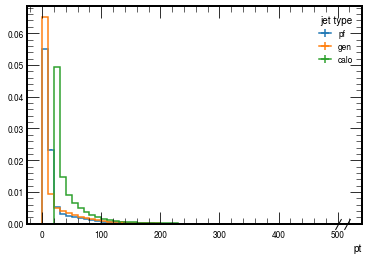

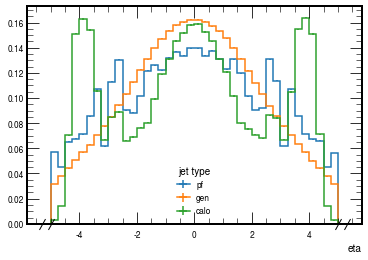

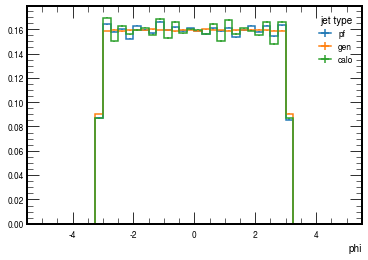

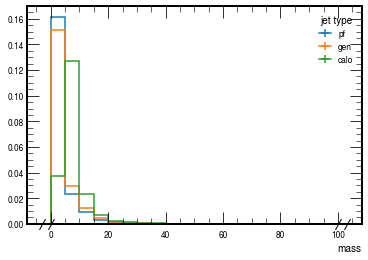

In [10]:
for ivar in ['pt', 'eta', 'phi', 'mass']:
    fig, ax = plt.subplots()
    hists.project("jet_type", ivar).plot1d(ax=ax, density=True)
    ax.legend(title="jet type")

## Exercise 1: Plotting basic quantities

Let's make some basic plots about jets:

In [11]:
hists = (
    hist.Hist.new
    .Reg(50, 0, 500, name="pt")
    .Reg(40, -5, 5, name="eta")
    .Reg(40, -5, 5, name="phi")
    .Reg(20, 0, 100, name="mass")
    .Weight()
    .fill(
        pt=ak.flatten(events.Jet.pt),
        eta=ak.flatten(events.Jet.eta),
        phi=ak.flatten(events.Jet.phi),
        mass=ak.flatten(events.Jet.mass)
    )
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8e72ba6580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

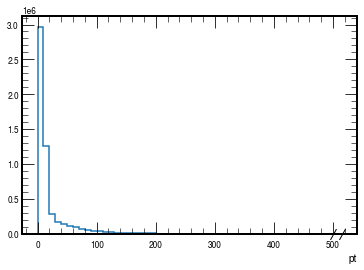

In [12]:
fig, ax = plt.subplots()
hists.project("pt")[::].plot1d()
# plotting transverse momentum - probability of high p_T exponentially decreases

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8e715644f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

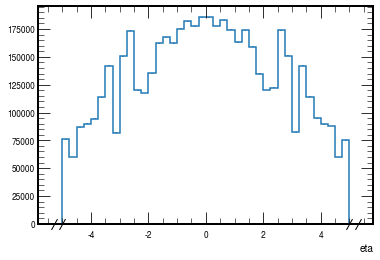

In [13]:
hists.project("eta").plot1d()
# plotting pseudorapidity

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8e738383d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

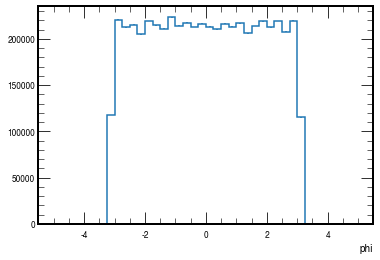

In [14]:
hists.project("phi").plot1d()
# plotting azimuthal angle- mainly flat since pp collisions are symmetric in that angle (uniformity/symmetry of the detector itself)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8e72e97130>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

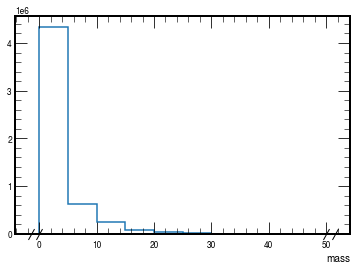

In [15]:
hists.project("mass")[:50j:].plot1d()
# plotting mass- drops off after ~0 since ak4 jets radius is only comprised of small objects like gluons and quarks that have almost no mass

### NanoAOD Jet Content

We have two types of jets in nanoAOD: ak4 (Jet) and ak8 jets (FatJet). Let's look at the content of nanoAOD:


In [16]:
events.Jet.fields

['area',
 'btagCSVV2',
 'btagDeepB',
 'btagDeepCvB',
 'btagDeepCvL',
 'btagDeepFlavB',
 'btagDeepFlavCvB',
 'btagDeepFlavCvL',
 'btagDeepFlavG',
 'btagDeepFlavQG',
 'btagDeepFlavUDS',
 'chEmEF',
 'chFPV0EF',
 'chFPV1EF',
 'chFPV2EF',
 'chFPV3EF',
 'chHEF',
 'eta',
 'hfEmEF',
 'hfHEF',
 'hfsigmaEtaEta',
 'hfsigmaPhiPhi',
 'mass',
 'muEF',
 'muonSubtrFactor',
 'neEmEF',
 'neHEF',
 'particleNetAK4_B',
 'particleNetAK4_CvsB',
 'particleNetAK4_CvsL',
 'particleNetAK4_QvsG',
 'particleNetAK4_puIdDisc',
 'phi',
 'pt',
 'puIdDisc',
 'puId_beta',
 'puId_dR2Mean',
 'puId_frac01',
 'puId_frac02',
 'puId_frac03',
 'puId_frac04',
 'puId_jetR',
 'puId_jetRchg',
 'puId_majW',
 'puId_minW',
 'puId_ptD',
 'puId_pull',
 'qgl',
 'qgl_axis2',
 'qgl_ptD',
 'rawFactor',
 'bRegCorr',
 'bRegRes',
 'cRegCorr',
 'cRegRes',
 'electronIdx1',
 'electronIdx2',
 'hfadjacentEtaStripsSize',
 'hfcentralEtaStripSize',
 'jetId',
 'muonIdx1',
 'muonIdx2',
 'nConstChHads',
 'nConstElecs',
 'nConstHFEMs',
 'nConstHFHads',
 

In [17]:
events.FatJet.fields

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'chEmEF',
 'chHEF',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'hfEmEF',
 'hfHEF',
 'mass',
 'msoftdrop',
 'muEF',
 'n2b1',
 'n3b1',
 'neEmEF',
 'neHEF',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'nConstChHads',
 'nConstElecs',
 'nConstHFEMs',
 'nConstHFHads',
 'nConstMuons',
 'nCon

## Your turn

You can fill some histograms with the variables from nanoAOD in the cell below:

/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


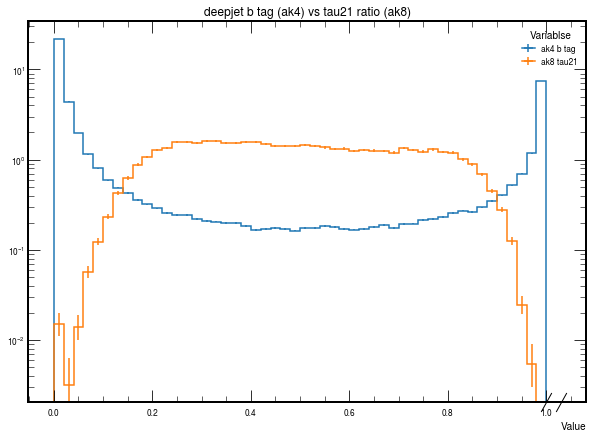

In [24]:
ak4c = (events.Jet.pt > 50) & (np.abs(events.Jet.eta) < 2.4)
ak8c = (events.FatJet.pt > 200) & (np.abs(events.FatJet.eta) < 2.4)


ak4_jets = events.Jet[ak4c]
ak8_jets = events.FatJet[ak8c]
#flaten data to plot
ak4_bscore = ak.flatten(ak4_jets.btagDeepFlavB)
ak8_msoftdrop = ak.flatten(ak8_jets.msoftdrop)
ak8_tau21 = ak.flatten(ak8_jets.tau2 / ak8_jets.tau1)



h = hist.Hist(
    hist.axis.StrCategory(["ak4 b tag", "ak8 tau21"], name="variable", label="Variable"),
    hist.axis.Regular(50, 0, 1, name="value", label="score")
)


h.fill("ak4 b tag", ak4_bscore)


h.fill("ak8 tau21", ak8_tau21)

fig1, ax1 = plt.subplots(figsize=(10, 7))


h.project("variable", "value").plot1d(ax=ax1, density=True)

ax1.set_title("deepjet b tag (ak4) vs tau21 ratio (ak8)")
ax1.set_xlabel("particular Value")
ax1.set_ylabel("probability")
ax1.legend(title="Variablse")
ax1.set_yscale('log')
plt.show()
# deepjet b tagging score comapred to tau21 ratio
# very small small probability of light quarks and gluons being in b jets so peak near 0 and peak at 1?

# ak8 jet from QCD background - One pronged jet for ak8 so T1 and T2 are both high so ration is around 1                        